**Autor** : Renato de Moraes

**e-mail**: rntmoraes@gmail.com

#  <a name="resumo"> RESUMO </a>

Esse notebook tem como objetivo fazer uma análise descritiva dos microdados do Enem de 2021 para entender quais fatores podem influenciar na nota do Enem.  
É um consenso que os fatores socioeconômicos têm influência direta no desempenho escolar, porém o o Ceará, apesar de não estar entre os estados mais ricos do Brasil é reconhecido por ter qualidade de ensino acima da média nacional, por isso analisaremos os microdados do Enem 2021 para que possamos corroborar ou questionar a forma como percebemos a educação no Brasil e os fatores que levam os alunos a obterem alto desempenho em avaliações como o Enem.

#  <a name="indice">  Índice </a>

* [Resumo](#resumo)
* [Índice](#indice)
* [Seção 1 - Importando os Arquivos](#secao_1)
* [Seção 2 - Visualizando os Dados](#secao_2)
* [Seção 3 - Tratamento de Dados](#secao_3)
* [Seção 4 - Análise Exploratória e Tratamento de Dados Adicionais](#secao_4)
* [Conclusão](#conclusao)

#  <a name="secao_1"> Seção 1 - Importando as bibliotecas e arquivos</a>
[Voltar ao índice](#indice)

In [1]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
raw_data = pd.read_csv('microdados-enem-2021.csv', sep=';')
raw_data.head()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,210053865474,2021,5,F,1,1,1,1,3,1,...,A,A,A,B,A,A,B,A,B,B
1,210052384164,2021,12,M,1,1,1,1,11,1,...,A,A,A,B,A,A,C,A,A,A
2,210052589243,2021,13,F,3,1,1,1,15,1,...,B,A,A,B,A,A,C,B,B,B
3,210052128335,2021,3,M,1,3,1,2,0,2,...,A,A,A,B,A,A,B,A,B,B
4,210051353021,2021,2,F,1,3,1,2,0,2,...,B,A,A,B,A,B,E,A,B,B


#  <a name="secao_2"> Seção 2 - Visualizando os Dados</a>
[Voltar ao índice](#indice)

In [3]:
def show_info(data):
    print('DATASET SHAPE: {}'.format(data.shape))
    print('-'*50)
    print('FEATURE DATA TYPES:\n')
    display(data.info())
    print('-'*50)
    print('STATISTICAL INFORMATION:')
    display(data.describe().round(2).T)

In [4]:
show_info(raw_data)

DATASET SHAPE: (3389832, 76)
--------------------------------------------------
FEATURE DATA TYPES:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3389832 entries, 0 to 3389831
Data columns (total 76 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   NU_INSCRICAO            int64  
 1   NU_ANO                  int64  
 2   TP_FAIXA_ETARIA         int64  
 3   TP_SEXO                 object 
 4   TP_ESTADO_CIVIL         int64  
 5   TP_COR_RACA             int64  
 6   TP_NACIONALIDADE        int64  
 7   TP_ST_CONCLUSAO         int64  
 8   TP_ANO_CONCLUIU         int64  
 9   TP_ESCOLA               int64  
 10  TP_ENSINO               float64
 11  IN_TREINEIRO            int64  
 12  CO_MUNICIPIO_ESC        float64
 13  NO_MUNICIPIO_ESC        object 
 14  CO_UF_ESC               float64
 15  SG_UF_ESC               object 
 16  TP_DEPENDENCIA_ADM_ESC  float64
 17  TP_LOCALIZACAO_ESC      float64
 18  TP_SIT_FUNC_ESC         float64
 19  CO_M

None

--------------------------------------------------
STATISTICAL INFORMATION:


,count,mean,std,min,25%,50%,75%,max
NU_INSCRICAO,3389832.0,2.100527e+11,996240.25,2.100510e+11,2.100519e+11,2.100527e+11,2.100536e+11,2.100545e+11
NU_ANO,3389832.0,2.021000e+03,0.00,2.021000e+03,2.021000e+03,2.021000e+03,2.021000e+03,2.021000e+03
TP_FAIXA_ETARIA,3389832.0,5.310000e+00,3.90,1.000000e+00,2.000000e+00,4.000000e+00,7.000000e+00,2.000000e+01
TP_ESTADO_CIVIL,3389832.0,1.050000e+00,0.41,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,4.000000e+00
TP_COR_RACA,3389832.0,2.040000e+00,1.02,0.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00
TP_NACIONALIDADE,3389832.0,1.030000e+00,0.20,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,4.000000e+00
TP_ST_CONCLUSAO,3389832.0,1.610000e+00,0.72,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,4.000000e+00
TP_ANO_CONCLUIU,3389832.0,2.580000e+00,4.28,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00,1.500000e+01
TP_ESCOLA,3389832.0,1.400000e+00,0.59,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00
TP_ENSINO,1096828.0,1.010000e+00,0.08,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00


In [5]:
raw_data.columns

Index(['NU_INSCRICAO', 'NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'CO_MUNICIPIO_PROVA', 'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA',
       'SG_UF_PROVA', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
       'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH', 'TX_RESPOSTAS_LC',
       'TX_RESPOSTAS_MT', 'TP_LINGUA', 'TX_GABARITO_CN', 'TX_GABARITO_CH',
       'TX_GABARITO_LC', 'TX_GABARITO_MT', 'TP_STATUS_REDACAO',
       'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4',
       'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q003', 'Q004',

#### Representação visual da quantidade de valores nulos, por coluna

<AxesSubplot:>

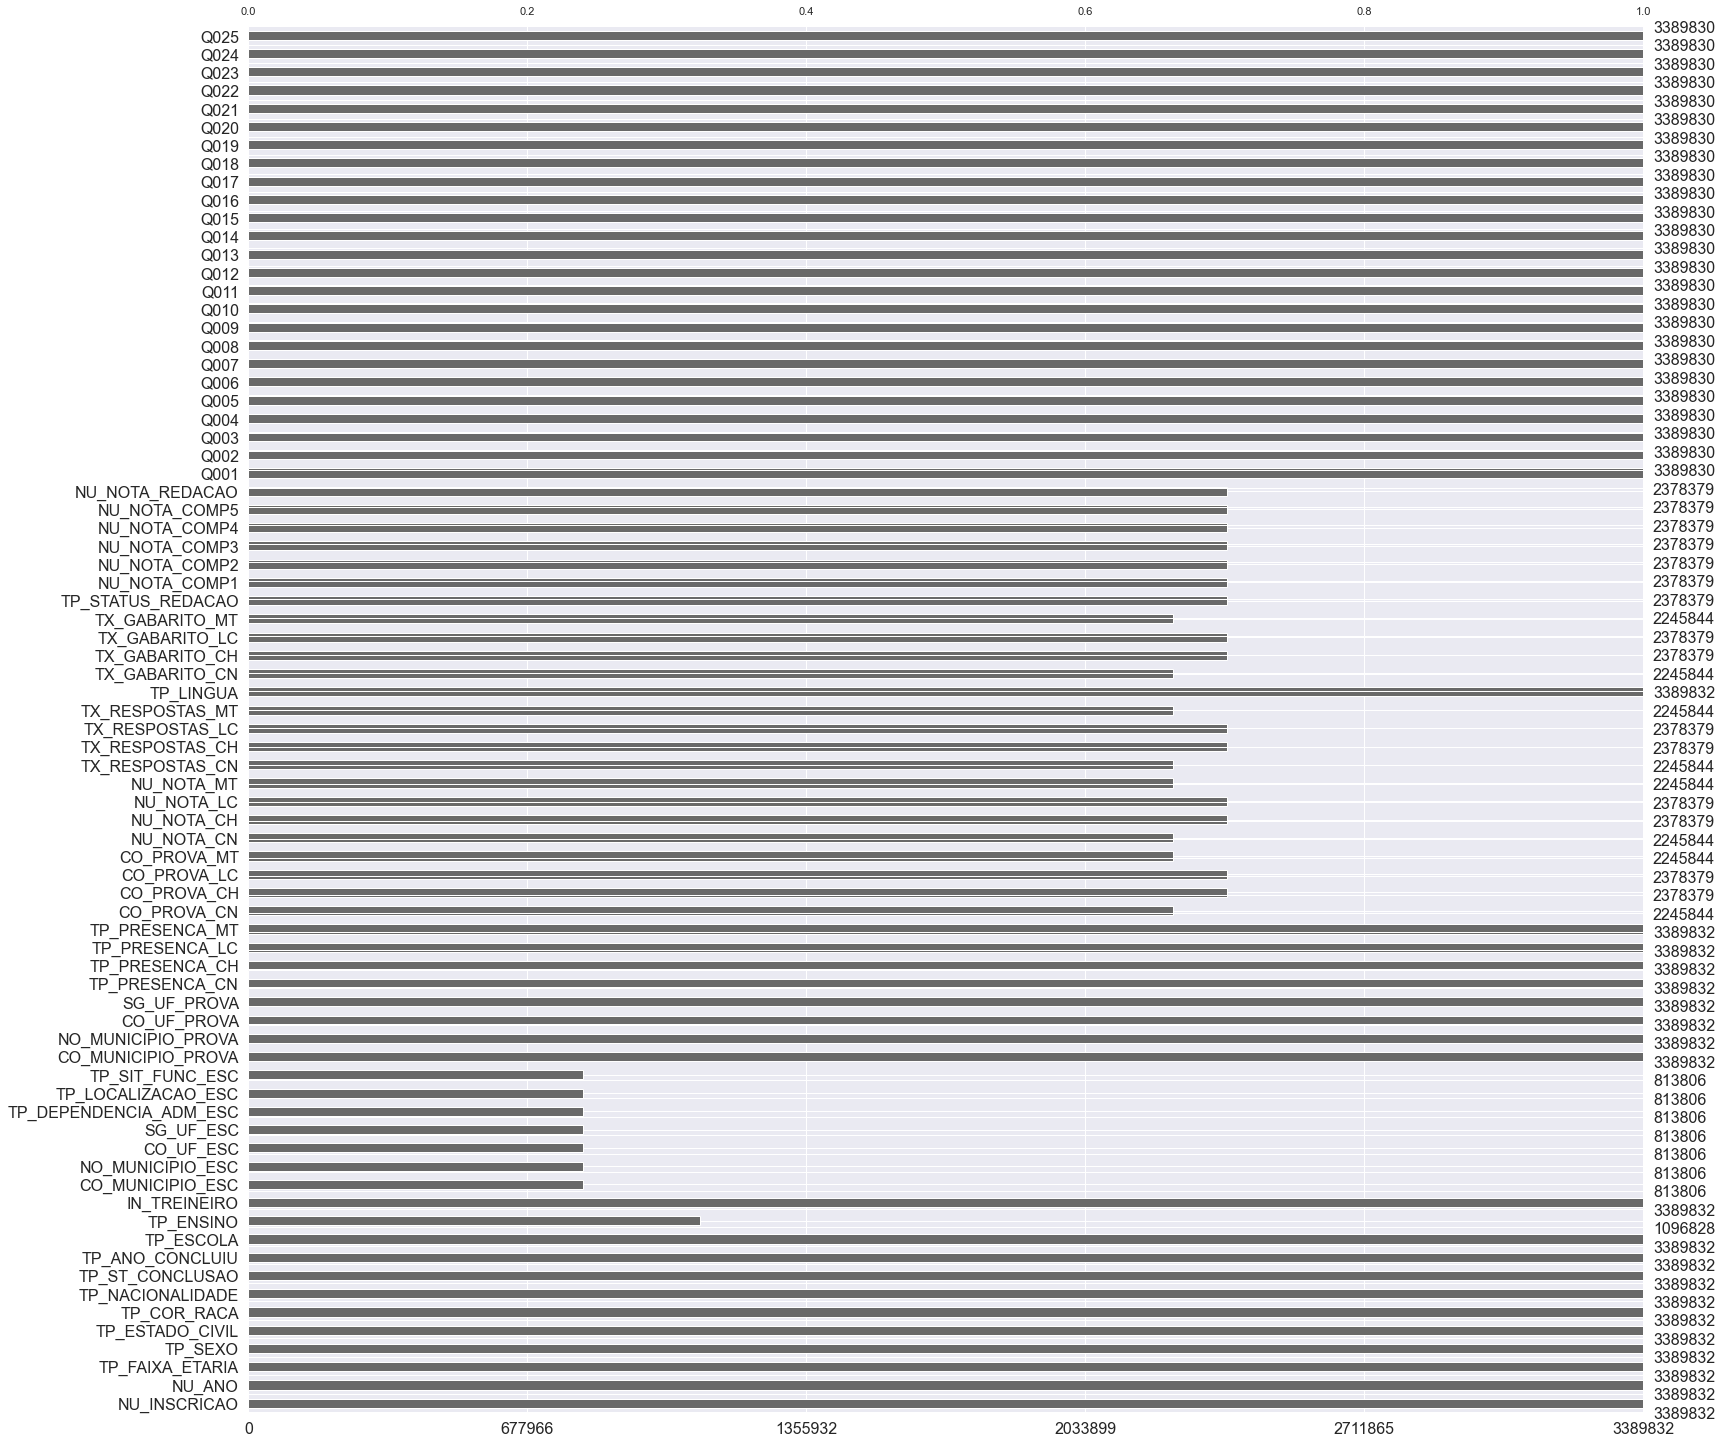

In [6]:
msno.bar(raw_data)

#  <a name="secao_3"> Seção 3 - Tratamento de Dados</a>
[Voltar ao índice](#indice)

### Selecionando as colunas (features) relevantes para a análise dos fatores socio-econômicos que influenciam o desempenho dos alunos no exame do Enem.   
#### Essa seleção de features será feita após estudo/análise da planilha 'Dicionário_Microdados_Enem_2021' e a correlação com as notas dos alunos, conforme tabelas e gráfico abaixo:

In [6]:
correlacao_df = raw_data.corr()
correlacao_df.shape

(39, 39)

#### Correlação das features com as notas no Enem:

In [7]:
corr_notas_df = correlacao_df[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']]

<AxesSubplot:>

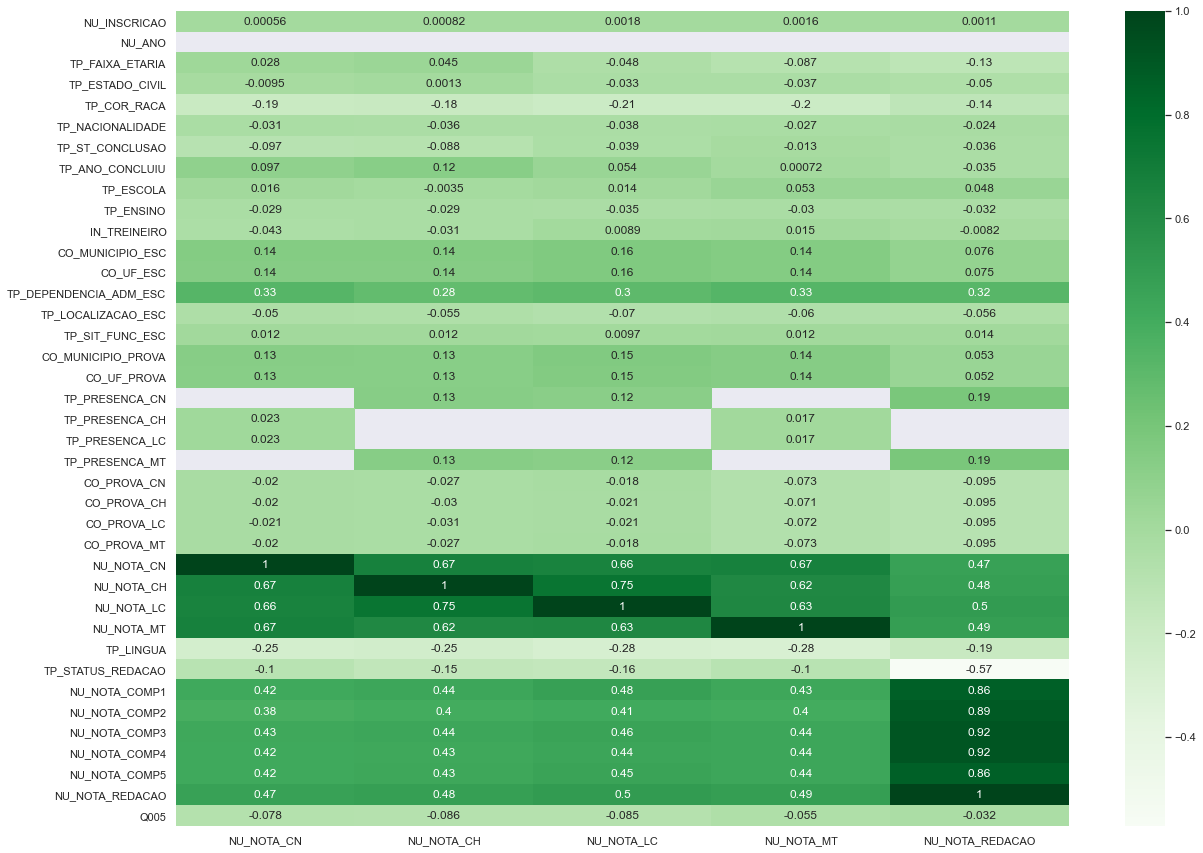

In [8]:
plt.figure(figsize=(20,15))
sns.heatmap(corr_notas_df, annot=True, cmap='Greens')

In [10]:
corr_notas_df

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
NU_INSCRICAO,0.000560,0.000819,0.001797,0.001646,0.001104
NU_ANO,NaN,NaN,NaN,NaN,NaN
TP_FAIXA_ETARIA,0.028454,0.045368,-0.048257,-0.087409,-0.126709
TP_ESTADO_CIVIL,-0.009519,0.001290,-0.033096,-0.036921,-0.050200
TP_COR_RACA,-0.189502,-0.179303,-0.206333,-0.204871,-0.135087
TP_NACIONALIDADE,-0.031068,-0.036307,-0.037540,-0.027126,-0.023735
TP_ST_CONCLUSAO,-0.096617,-0.088403,-0.038973,-0.012725,-0.035873
TP_ANO_CONCLUIU,0.096759,0.121866,0.053975,0.000725,-0.034777
TP_ESCOLA,0.016393,-0.003545,0.013729,0.052856,0.048354
TP_ENSINO,-0.029094,-0.028876,-0.034956,-0.029662,-0.031686


#### A correlação do tipo de escola ('TP_ESCOLA') é muito maior com a nota de matemática do que com as demais notas. Uma análise mais aprofundada será feita adiante

In [11]:
corr_notas_df.sort_values('NU_NOTA_MT', ascending=False)

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
NU_NOTA_MT,0.668964,0.623457,0.627946,1.000000,0.485821
NU_NOTA_CN,1.000000,0.673171,0.661453,0.668964,0.467295
NU_NOTA_LC,0.661453,0.750930,1.000000,0.627946,0.504348
NU_NOTA_CH,0.673171,1.000000,0.750930,0.623457,0.482009
NU_NOTA_REDACAO,0.467295,0.482009,0.504348,0.485821,1.000000
NU_NOTA_COMP4,0.421240,0.426454,0.442384,0.440182,0.915502
NU_NOTA_COMP3,0.427300,0.439763,0.458168,0.438081,0.918302
NU_NOTA_COMP5,0.417607,0.433950,0.454122,0.435067,0.860290
NU_NOTA_COMP1,0.417548,0.440324,0.476542,0.433312,0.863942
NU_NOTA_COMP2,0.381787,0.402933,0.414614,0.399278,0.894539


#### A análise dos fatores que influenciam o desempenho dos alunos será feita em relação as notas com TRI (Teoria de resposta ao item  ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT']), por isso as notas da Redação não serão consideradas.

In [13]:
df = raw_data[['TP_DEPENDENCIA_ADM_ESC', 'CO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC', 'CO_MUNICIPIO_PROVA','CO_UF_PROVA',
             'TP_ESCOLA', 'Q001', 'Q002', 'Q005', 'Q006', 'Q022', 'Q024', 'Q025', 'TP_COR_RACA', 'TP_FAIXA_ETARIA',
            'TP_LOCALIZACAO_ESC', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT']]

<AxesSubplot:>

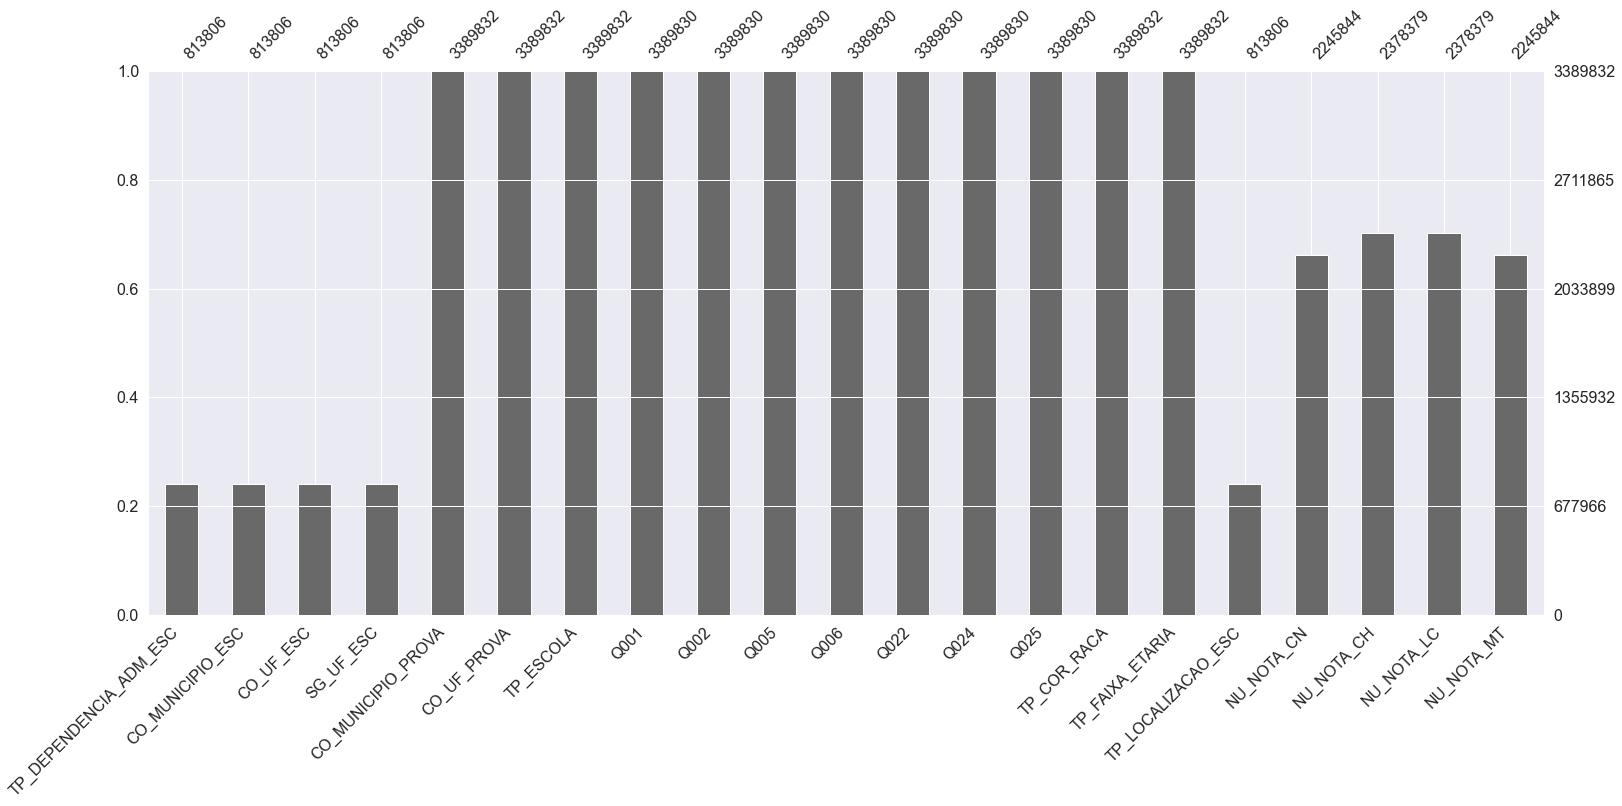

In [14]:
msno.bar(df)

### Local da Escola  vs  Local da Prova  

#### Siglas dos Estados

In [15]:
sg_uf = df.SG_UF_ESC.unique()[1:]
sg_uf

array(['CE', 'BA', 'ES', 'SP', 'PE', 'PA', 'RS', 'RJ', 'GO', 'DF', 'MG',
       'RN', 'MA', 'PI', 'AM', 'PR', 'AL', 'MT', 'SC', 'PB', 'RO', 'SE',
       'MS', 'TO', 'RR', 'AP', 'AC'], dtype=object)

#### Código dos Estados

In [16]:
cod_uf = df.CO_UF_ESC.unique()[1:]
cod_uf

array([23., 29., 32., 35., 26., 15., 43., 33., 52., 53., 31., 24., 21.,
       22., 13., 41., 27., 51., 42., 25., 11., 28., 50., 17., 14., 16.,
       12.])

#### Juntando os códigos e as siglas dos estados em um dicionário

In [17]:
sg_cod = dict(zip(cod_uf, sg_uf))
sg_cod

{23.0: 'CE',
 29.0: 'BA',
 32.0: 'ES',
 35.0: 'SP',
 26.0: 'PE',
 15.0: 'PA',
 43.0: 'RS',
 33.0: 'RJ',
 52.0: 'GO',
 53.0: 'DF',
 31.0: 'MG',
 24.0: 'RN',
 21.0: 'MA',
 22.0: 'PI',
 13.0: 'AM',
 41.0: 'PR',
 27.0: 'AL',
 51.0: 'MT',
 42.0: 'SC',
 25.0: 'PB',
 11.0: 'RO',
 28.0: 'SE',
 50.0: 'MS',
 17.0: 'TO',
 14.0: 'RR',
 16.0: 'AP',
 12.0: 'AC'}

#### Incluindo a coluna 'SG_UF_PROVA' com as siglas dos estados referente à 'CO_UF_PROVA':

In [19]:
df['SG_UF_PROVA'] = df['CO_UF_PROVA'].map(sg_cod)

<ipython-input-19-e21a45af4640>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SG_UF_PROVA'] = df['CO_UF_PROVA'].map(sg_cod)


In [20]:
df[['SG_UF_PROVA', 'CO_UF_PROVA']].head()

,SG_UF_PROVA,CO_UF_PROVA
0,MG,31
1,AL,27
2,SP,35
3,CE,23
4,CE,23


#### Calculando a diferença entre  'CO_UF_PROVA' e 'CO_UF_ESC', pois temos muitos valores NaN em 'CO_UF_ESC'

In [21]:
estado_df = df[['SG_UF_ESC', 'CO_UF_ESC', 'CO_UF_PROVA']].dropna(axis=0)
estado_df.head(10)

,SG_UF_ESC,CO_UF_ESC,CO_UF_PROVA
3,CE,23.0,23
4,CE,23.0,23
14,BA,29.0,29
33,BA,29.0,29
45,ES,32.0,32
51,ES,32.0,32
55,BA,29.0,29
59,ES,32.0,32
63,SP,35.0,35
71,SP,35.0,35


In [22]:
uf_total = estado_df.shape[0]
uf_total

813806

In [23]:
uf_igual = estado_df[estado_df['CO_UF_ESC']==estado_df['CO_UF_PROVA']].shape[0]
uf_igual

803488

#### Diferença entre 'CO_UF_PROVA' e 'CO_UF_ESC':

In [24]:
1 - uf_igual/uf_total

0.012678697379965298

#### Diferença entre 'CO_UF_PROVA' e 'CO_UF_ESC' por estado:

In [25]:
for cod in cod_uf:
    uf_prova = estado_df[estado_df['CO_UF_PROVA']==cod].shape[0]
    uf_escola = estado_df[estado_df['CO_UF_ESC']==cod].shape[0]
    print(sg_cod[cod], '- {:.2%}'.format(uf_prova/uf_escola -1))

CE - -0.60%
BA - -0.46%
ES - -0.53%
SP - 0.38%
PE - 1.48%
PA - -0.61%
RS - -0.02%
RJ - -0.21%
GO - -0.79%
DF - 1.06%
MG - -0.01%
RN - 2.00%
MA - 0.07%
PI - -0.77%
AM - -0.16%
PR - -0.19%
AL - -1.99%
MT - 0.39%
SC - 1.31%
PB - -2.56%
RO - -0.57%
SE - 3.23%
MS - 0.97%
TO - -0.43%
RR - 0.00%
AP - 1.89%
AC - 2.96%


### Selecionando somente as features com a quantidade de valores não-nulos superior a 60% da base de dados

In [26]:
df.columns

Index(['TP_DEPENDENCIA_ADM_ESC', 'CO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'CO_MUNICIPIO_PROVA', 'CO_UF_PROVA', 'TP_ESCOLA', 'Q001', 'Q002',
       'Q005', 'Q006', 'Q022', 'Q024', 'Q025', 'TP_COR_RACA',
       'TP_FAIXA_ETARIA', 'TP_LOCALIZACAO_ESC', 'NU_NOTA_CN', 'NU_NOTA_CH',
       'NU_NOTA_LC', 'NU_NOTA_MT', 'SG_UF_PROVA'],
      dtype='object')

<AxesSubplot:>

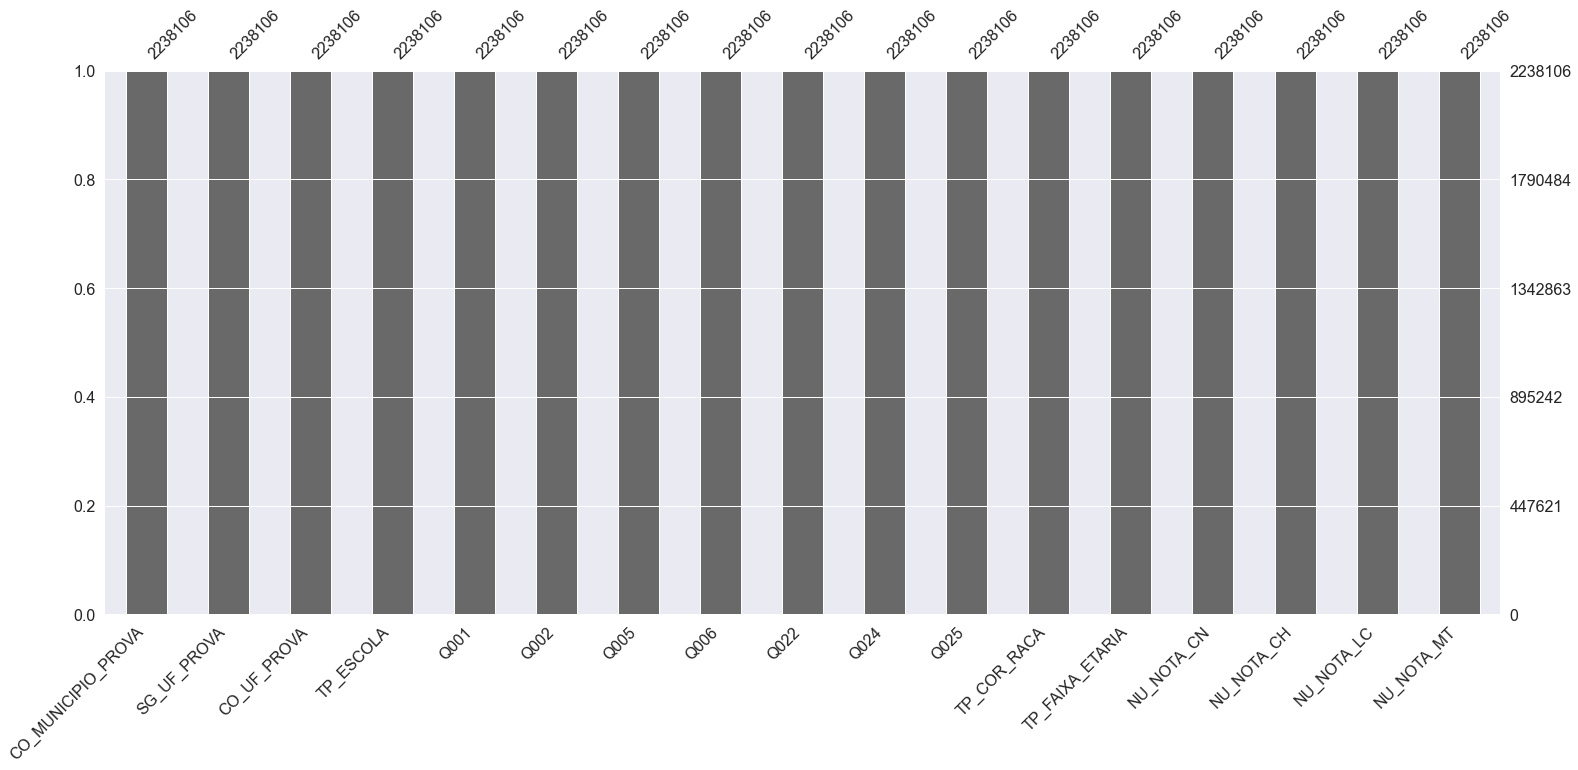

In [27]:
df1 = df[['CO_MUNICIPIO_PROVA', 'SG_UF_PROVA', 'CO_UF_PROVA', 'TP_ESCOLA', 'Q001', 'Q002', 'Q005', 'Q006', 
           'Q022', 'Q024', 'Q025', 'TP_COR_RACA', 'TP_FAIXA_ETARIA', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 
           'NU_NOTA_MT']].dropna(axis=0)
msno.bar(df1)

In [28]:
df1.shape

(2238106, 17)

#  <a name="secao_4"> Seção 4 - Análise Exploratória e tratamento de dados adicionais</a>
[Voltar ao índice](#indice)

#### Média das notas do Enem 2021:  
CN: Ciências da Natureza  
CH: Ciências Humanas  
LC: Linguagem e Códigos  
MT: Matemática

In [29]:
df_notas = df1[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT']]
df_notas.describe().T

,count,mean,std,min,25%,50%,75%,max
NU_NOTA_CN,2238106.0,491.901015,80.499745,0.0,431.1,482.1,545.9,867.1
NU_NOTA_CH,2238106.0,523.182090,94.386241,0.0,448.9,525.6,591.9,846.9
NU_NOTA_LC,2238106.0,504.875286,78.097050,0.0,450.1,508.2,560.8,826.1
NU_NOTA_MT,2238106.0,535.197103,110.577754,0.0,444.8,515.5,614.0,953.1


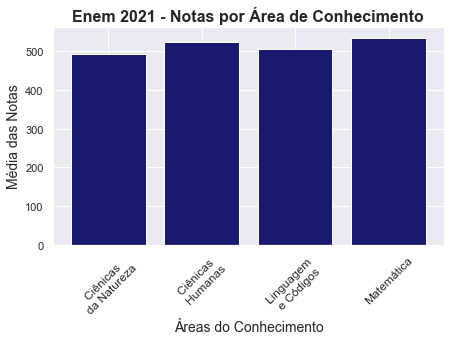

In [30]:
areas_conhecimento = ['Ciênicas \nda Natureza', 'Ciênicas \nHumanas', 'Linguagem \ne Códigos', 'Matemática']

plt.figure(figsize=(7,4))
plt.bar(x = df_notas.describe().T.index,
        height = df_notas.describe().T['mean'],
        color = 'midnightblue')
plt.xticks([0,1,2,3] , labels = areas_conhecimento, rotation = 45, fontsize = 12)
plt.xlabel('Áreas do Conhecimento', fontsize = 14)
plt.ylabel('Média das Notas', fontsize = 14)
plt.title('Enem 2021 - Notas por Área de Conhecimento', fontsize = 16, fontweight = 'bold')
plt.show()

#### Qtde de alunos que prestaram o Enem (divididos entre 2.Pública e 3.Privada)  
1. Não respondeu  
2. Pública  
3. Privada

In [31]:
df1['TP_ESCOLA'].value_counts()

1    1390709
2     668036
3     179361
Name: TP_ESCOLA, dtype: int64

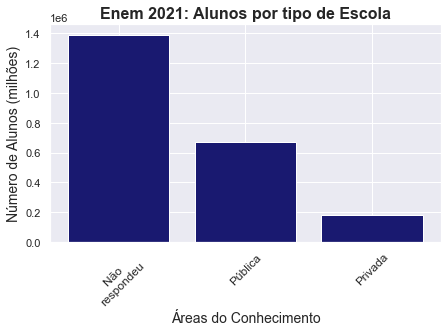

In [32]:
tipo_escola = ['Não \nrespondeu', 'Pública', 'Privada']

plt.figure(figsize=(7,4))
plt.bar(x = df1['TP_ESCOLA'].value_counts().index,
        height = df1['TP_ESCOLA'].value_counts(),
        color = 'midnightblue')
plt.xticks([1,2,3] , labels = tipo_escola, rotation = 45, fontsize = 12)
plt.xlabel('Áreas do Conhecimento', fontsize = 14)
plt.ylabel('Número de Alunos (milhões)', fontsize = 14)
plt.title('Enem 2021: Alunos por tipo de Escola', fontsize = 16, fontweight = 'bold')
plt.show()

#### Desempenho dos alunos de escola pública:

In [33]:
escola_publica = df1[df1['TP_ESCOLA']==2][['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT']].mean()
escola_publica

NU_NOTA_CN    469.457904
NU_NOTA_CH    498.438536
NU_NOTA_LC    485.255554
NU_NOTA_MT    508.643054
dtype: float64

####  Desempenho dos alunos de escola privada:

In [34]:
escola_privada = df1[df1['TP_ESCOLA']==3][['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT']].mean()
escola_privada

NU_NOTA_CN    538.988388
NU_NOTA_CH    567.547878
NU_NOTA_LC    546.156276
NU_NOTA_MT    608.088056
dtype: float64

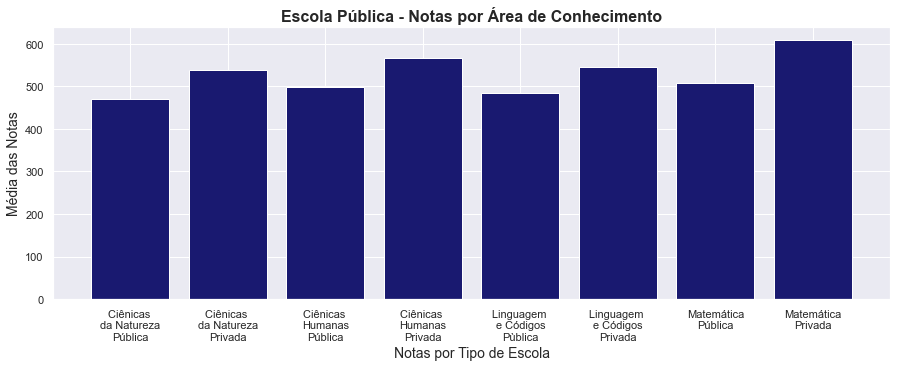

In [35]:
areas_conhecimento_pp = ['Ciênicas \nda Natureza\nPública', 'Ciênicas \nda Natureza\nPrivada','Ciênicas \nHumanas\nPública',
                         'Ciênicas \nHumanas\nPrivada','Linguagem \ne Códigos\nPùblica', 'Linguagem \ne Códigos\nPrivada',
                         'Matemática\nPública', 'Matemática\nPrivada']

plt.figure(figsize=(15,5))
plt.bar(x = areas_conhecimento_pp,
        height = [escola_publica[0], escola_privada[0], escola_publica[1], escola_privada[1], escola_publica[2], 
                  escola_privada[2], escola_publica[3], escola_privada[3]],
        color = 'midnightblue')
#plt.xticks([0,1,2,3] , labels = areas_conhecimento, rotation = 45, fontsize = 12)
plt.xlabel('Notas por Tipo de Escola', fontsize = 14)
plt.ylabel('Média das Notas', fontsize = 14)
plt.title('Escola Pública - Notas por Área de Conhecimento', fontsize = 16, fontweight = 'bold')
plt.show()

#### Decréscimo (%) das notas dos alunos de escola pública em relação aos alunos de escola privada: 

In [36]:
areas = ['CN: ', 'CH: ', 'LC: ', 'MT: ']
for i, m in enumerate(escola_privada):
    print(areas[i], (1-escola_publica[i]/m).round(2))

CN:  0.13
CH:  0.12
LC:  0.11
MT:  0.16


#### A partir desse ponto as análises serão baseadas nas médias das notas de Matemática, pois essa área de conhecimento apresenta a maior diferença entre alunos de escolas públicas e privadas:

In [37]:
df1.columns

Index(['CO_MUNICIPIO_PROVA', 'SG_UF_PROVA', 'CO_UF_PROVA', 'TP_ESCOLA', 'Q001',
       'Q002', 'Q005', 'Q006', 'Q022', 'Q024', 'Q025', 'TP_COR_RACA',
       'TP_FAIXA_ETARIA', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
       'NU_NOTA_MT'],
      dtype='object')

In [38]:
df1.drop(columns=['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC'], axis=1, inplace=True)
df1.columns

Index(['CO_MUNICIPIO_PROVA', 'SG_UF_PROVA', 'CO_UF_PROVA', 'TP_ESCOLA', 'Q001',
       'Q002', 'Q005', 'Q006', 'Q022', 'Q024', 'Q025', 'TP_COR_RACA',
       'TP_FAIXA_ETARIA', 'NU_NOTA_MT'],
      dtype='object')

### Análise dos dados do questionário sócioeconômico  
#### Serão analisados somente as questões/features que apresentaram correlação relevante com as notas TRI 

### Q001

#### Até que série seu pai, ou o homem responsável por você, estudou?  
A: Nunca estudou  
B: Não completou a 4ª série/5º ano do Ensino Fundamental.  
C: Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.  
D: Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.  
E: Completou o Ensino Médio, mas não completou a Faculdade.  
F: Completou a Faculdade, mas não completou a Pós-graduação.  
G: Completou a Pós-graduação.  
H: Não sei.

In [39]:
df1['Q001'].value_counts().sort_values(ascending=False)

E    681530
B    349980
C    281447
F    246549
D    245630
G    183606
H    172965
A     76399
Name: Q001, dtype: int64

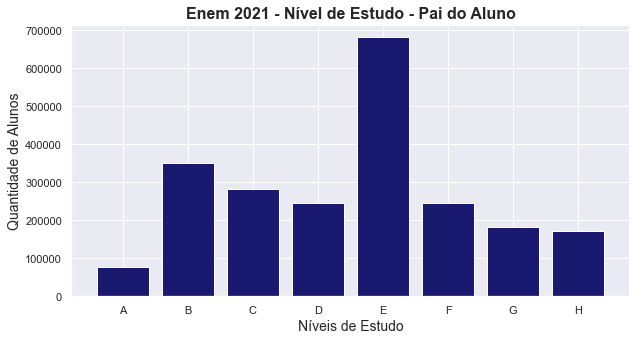

In [40]:
plt.figure(figsize=(10,5))
plt.bar(x = df1['Q001'].value_counts().sort_index().index,
        height = df1['Q001'].value_counts().sort_index(),
        color = 'midnightblue')
#plt.xticks([0,1,2,3] , labels = areas_conhecimento, rotation = 45, fontsize = 12)
plt.xlabel('Níveis de Estudo', fontsize = 14)
plt.ylabel('Quantidade de Alunos', fontsize = 14)
plt.title('Enem 2021 - Nível de Estudo - Pai do Aluno', fontsize = 16, fontweight = 'bold')
plt.show()

#### A nota fica acima da média a partir da categoria 'E' (Pai completou o Ensino Médio, mas não completou a Faculdade).

In [41]:
nivel_estudo = ['A','B','C','D','E','F','G','H']

notas_mt = [df1[df1['Q001']==n]['NU_NOTA_MT'].mean() for n in nivel_estudo]
notas_mt

[471.65824290893744,
 492.42939339391296,
 511.0701634765968,
 521.9734930586656,
 543.1136140742168,
 597.5118633618549,
 613.4610895068694,
 504.7400751597221]

#### O maior salto de performance acontece a partir de categoria 'F' (Completou a Faculdade, mas não completou a Pós-graduação.) 

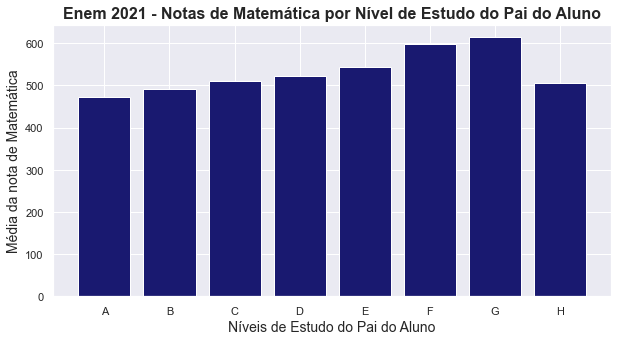

In [42]:
plt.figure(figsize=(10,5))
plt.bar(x = nivel_estudo,
        height = notas_mt,
        color = 'midnightblue')
plt.xlabel('Níveis de Estudo do Pai do Aluno', fontsize = 14)
plt.ylabel('Média da nota de Matemática', fontsize = 14)
plt.title('Enem 2021 - Notas de Matemática por Nível de Estudo do Pai do Aluno', fontsize = 16, fontweight = 'bold')
plt.show()

Com acéscimo de 10%, a mudança da categoria 'E' para a 'F' apresenta a maior diferença (2.5x maior que qualquer outra mudança de categoria).  
A categoria 'H' (resposta:' Não sei.'), não está sendo considerada nessa análise.

In [43]:
[(notas_mt[i+1]/nota) for i, nota in enumerate(notas_mt) if i < 6]

[1.044038561389005,
 1.037854706345225,
 1.0213343105531694,
 1.0405003727137065,
 1.100159981038893,
 1.0266927355304334]

### Q002

#### Até que série sua mãe, ou a mulher responsável por você, estudou?  
A: Nunca estudou  
B: Não completou a 4ª série/5º ano do Ensino Fundamental.  
C: Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.  
D: Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.  
E: Completou o Ensino Médio, mas não completou a Faculdade.  
F: Completou a Faculdade, mas não completou a Pós-graduação.  
G: Completou a Pós-graduação.  
H: Não sei.

In [44]:
df1['Q002'].value_counts().sort_values(ascending=False)

E    795005
F    321187
G    309702
D    245533
B    243449
C    226251
H     48908
A     48071
Name: Q002, dtype: int64

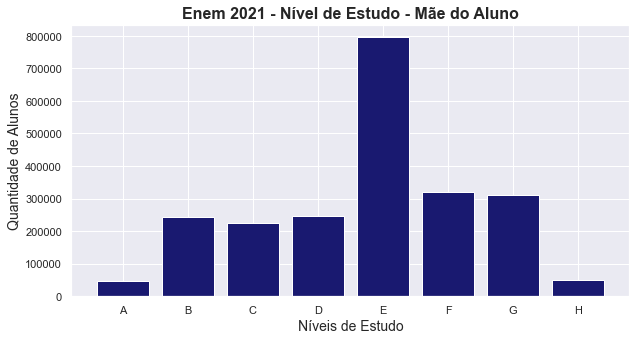

In [45]:
plt.figure(figsize=(10,5))
plt.bar(x = df1['Q002'].value_counts().sort_index().index,
        height = df1['Q002'].value_counts().sort_index(),
        color = 'midnightblue')
#plt.xticks([0,1,2,3] , labels = areas_conhecimento, rotation = 45, fontsize = 12)
plt.xlabel('Níveis de Estudo', fontsize = 14)
plt.ylabel('Quantidade de Alunos', fontsize = 14)
plt.title('Enem 2021 - Nível de Estudo - Mãe do Aluno', fontsize = 16, fontweight = 'bold')
plt.show()

#### A nota fica acima da média a partir da categoria 'F' (Mãe completou a Faculdade, mas não completou a Pós-graduação.).

In [46]:
notas_mt1 = [df1[df1['Q002']==n]['NU_NOTA_MT'].mean() for n in nivel_estudo]
notas_mt1

[464.2798631191384,
 484.99581883678644,
 501.08359079076547,
 510.3638692151458,
 533.3798384915854,
 582.6007547005458,
 592.4062912089657,
 493.23276764537354]

#### O maior salto de performance acontece a partir de categoria 'F' (Completou a Faculdade, mas não completou a Pós-graduação.) 

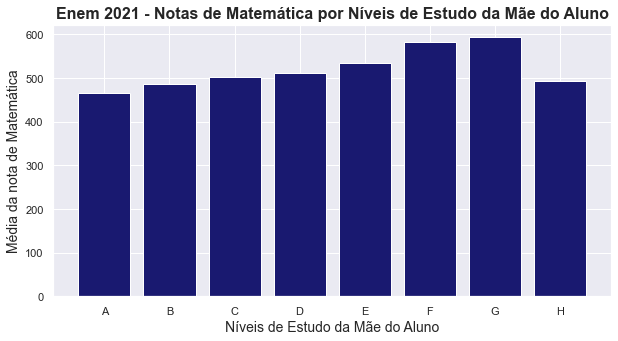

In [47]:
plt.figure(figsize=(10,5))
plt.bar(x = nivel_estudo,
        height = notas_mt1,
        color = 'midnightblue')
plt.xlabel('Níveis de Estudo da Mãe do Aluno', fontsize = 14)
plt.ylabel('Média da nota de Matemática', fontsize = 14)
plt.title('Enem 2021 - Notas de Matemática por Níveis de Estudo da Mãe do Aluno', fontsize = 16, fontweight = 'bold')
plt.show()

Com acéscimo de 9.2%, a mudança da categoria 'E' para a 'F' apresenta a maior diferença (2x maior que qualquer outra mudança de categoria).  
A categoria 'H' (resposta:' Não sei.'), não está sendo considerada nessa análise.

In [48]:
[(notas_mt1[i+1]/nota) for i, nota in enumerate(notas_mt1) if i < 6]

[1.0446195438640684,
 1.0331709497879051,
 1.018520419736226,
 1.045097176083084,
 1.092281171234666,
 1.016830627885918]

### Q006

#### Qual é a renda mensal de sua família? (Some a sua renda com a dos seus familiares.)  
A: Nenhuma Renda    
B: Até 1.100,00    
C: De 1.100,01 até 1.650,00    
D: De 1.650,01 até 2.200,00      
E: De 2.200,01 até 2.750,00     
F: De 2.750,01 até 3.300,00     
G: De 3.300,01 até 4.400,00     
H: De 4.400,01 até 5.500,00   
I: De 5.500,01 até 6.600,00  
J: De 6.600,01 até 7.700,00  
K: De 7.700,01 até 8.800,00  
L: De 8.800,01 até 9.900,00  
M: De 9.900,01 até 11.000,00  
N: De 11.000,01 até 13.200,00  
O: De 13.200,01 até 16.500,00  
P: De 16.500,01 até 22.000,00  
Q: Acima de R$ 22.000,00  

In [49]:
df1['Q006'].value_counts().sort_values(ascending=False)

B    546733
C    346838
D    277708
F    168049
G    147647
E    143957
H    118749
A    112899
I     75420
M     47849
J     46934
Q     39914
K     37157
O     32862
P     32802
L     32560
N     30028
Name: Q006, dtype: int64

#### A nota fica acima da média a partir da categoria 'E' (Renda Familiar de 2.200,01 até 2.750,00.)

In [50]:
niveis_renda = ['A','B','C','D','E','F','G','H','I','J','L','M','N','O','P','Q']
nota_por_renda = [df1[df1['Q006']==n]['NU_NOTA_MT'].mean() for n in niveis_renda]
nota_por_renda

[470.3391624372195,
 484.9908840329776,
 509.4820625190929,
 524.1212518184619,
 542.0489354459934,
 551.2878428315558,
 568.9087492465171,
 583.5461696519569,
 594.2806271545985,
 603.0603528359028,
 614.6268519656034,
 623.3533386277655,
 632.3703909684269,
 639.819466252817,
 648.1431101762148,
 662.6719822618642]

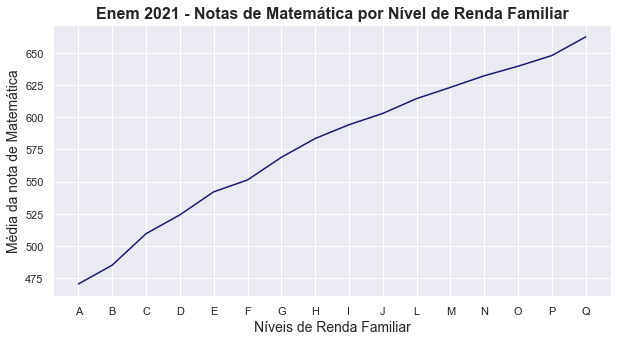

In [51]:
plt.figure(figsize=(10,5))
plt.plot(niveis_renda, nota_por_renda, color='midnightblue')

plt.title('Enem 2021 - Notas de Matemática por Nível de Renda Familiar', fontsize=16, fontweight='bold')
plt.ylabel('Média da nota de Matemática', fontsize=14)
plt.xlabel('Níveis de Renda Familiar', fontsize=14)
plt.show()

Com acéscimo de 5%, a mudança da categoria 'B' para a 'C' apresenta a maior diferença.  
A partir da mudança de 'H' para 'I' as diferenças diminuem e passam a ser inferiores à 2% até a última categoria 'Q'.

In [52]:
intervalo_renda = [(nota_por_renda[i+1]/nota) for i, nota in enumerate(nota_por_renda) if i < 15]
intervalo_renda

[1.0311513961963858,
 1.0504982243840484,
 1.0287334734160938,
 1.0342052217217497,
 1.0170444157001448,
 1.0319631688673847,
 1.0257289423388656,
 1.0183952154275024,
 1.0147737033316084,
 1.0191796709488674,
 1.0141980237834622,
 1.0144653951168552,
 1.0117796079493577,
 1.0130093633633035,
 1.0224161483128307]

### As questôes Q022, Q024, Q025 têm relação direta com a renda familar

### Q022

#### Na sua residência tem telefone celular?  
A: Não  
B: Sim, um  
C: Sim, dois  
D: Sim, três  
E: Sim, quatro ou mais

In [53]:
df1['Q022'].value_counts().sort_values(ascending=False)

D    714811
C    587811
E    578979
B    319248
A     37257
Name: Q022, dtype: int64

In [54]:
qtde_celular = ['A','B','C','D','E']
nota_por_celular = [df1[df1['Q022']==n]['NU_NOTA_MT'].mean() for n in qtde_celular]
nota_por_celular

[493.54822986284813,
 488.7843651330512,
 517.6530024106542,
 544.0210410863838,
 570.386728188758]

### Q024

#### Na sua residência tem computador?  
A: Não  
B: Sim, um  
C: Sim, dois  
D: Sim, três  
E: Sim, quatro ou mais

In [55]:
df1['Q024'].value_counts().sort_values(ascending=False)

B    954011
A    833126
C    279242
D    113143
E     58584
Name: Q024, dtype: int64

In [56]:
qtde_computador = ['A','B','C','D','E']
nota_por_computador = [df1[df1['Q024']==n]['NU_NOTA_MT'].mean() for n in qtde_computador]
nota_por_computador

[486.47789842113184,
 542.1494967039222,
 596.5221753890856,
 625.0346685168234,
 649.0088829714583]

### Q025

#### Na sua residência tem acesso à Internet?  
A: Sim  
B: Não

In [57]:
df1['Q025'].value_counts().sort_values(ascending=False)

B    2048739
A     189367
Name: Q025, dtype: int64

In [58]:
print('MÉDIA DA NOTA DE MATEMÁTICA\nCom acesso à internet: {}\nSem acesso à internet: {}'
      .format([df1[df1['Q025']=='A']['NU_NOTA_MT'].mean()], [df1[df1['Q025']=='B']['NU_NOTA_MT'].mean()])
     )

MÉDIA DA NOTA DE MATEMÁTICA
Com acesso à internet: [471.82822508674616]
Sem acesso à internet: [541.0543523601287]


### Análise por Estado

In [59]:
df1.columns

Index(['CO_MUNICIPIO_PROVA', 'SG_UF_PROVA', 'CO_UF_PROVA', 'TP_ESCOLA', 'Q001',
       'Q002', 'Q005', 'Q006', 'Q022', 'Q024', 'Q025', 'TP_COR_RACA',
       'TP_FAIXA_ETARIA', 'NU_NOTA_MT'],
      dtype='object')

In [60]:
df1['SG_UF_PROVA'].value_counts()

SP    350148
MG    219297
BA    174793
RJ    157663
CE    142823
PE    131527
PA    119357
RS    100882
PR     96115
MA     84915
GO     83844
PB     70800
PI     56661
RN     56363
SC     54294
DF     45005
AM     44560
ES     42048
AL     38703
SE     37363
MT     35031
MS     26855
TO     19799
RO     18704
AP     12997
AC     12718
RR      4841
Name: SG_UF_PROVA, dtype: int64

#### Os oito estados que apresentam a média da nota de matemática acima da média do país são compostos de todos os sete estados da região sul e sudeste mais o Distrito Federal. 

In [61]:
nota_media_por_estado = df1.groupby('SG_UF_PROVA')['NU_NOTA_MT'].mean().sort_values(ascending=False)
nota_media_por_estado

SG_UF_PROVA
SP    568.230224
MG    562.123165
SC    557.421476
DF    552.303317
RS    550.561835
RJ    549.713786
ES    549.563867
PR    549.298248
RN    529.785680
MS    529.152523
GO    527.883376
PE    524.387530
CE    521.787919
MT    521.157472
PB    518.076264
AL    516.866636
SE    516.817948
BA    513.612615
PI    510.987469
RR    509.836666
TO    506.949927
RO    506.515291
MA    496.260042
AC    495.814814
PA    494.843622
AP    491.480503
AM    486.419751
Name: NU_NOTA_MT, dtype: float64

### Comparando o nível de estudo dos pais dos alunos entre os estados melhor (sp) e pior (am) rankeados

### São Paulo

In [62]:
sp_df = df1[df1['SG_UF_PROVA']=='SP']
sp_df['NU_NOTA_MT'].describe()

count    350148.000000
mean        568.230224
std         112.656476
min           0.000000
25%         475.200000
50%         563.000000
75%         651.500000
max         953.100000
Name: NU_NOTA_MT, dtype: float64

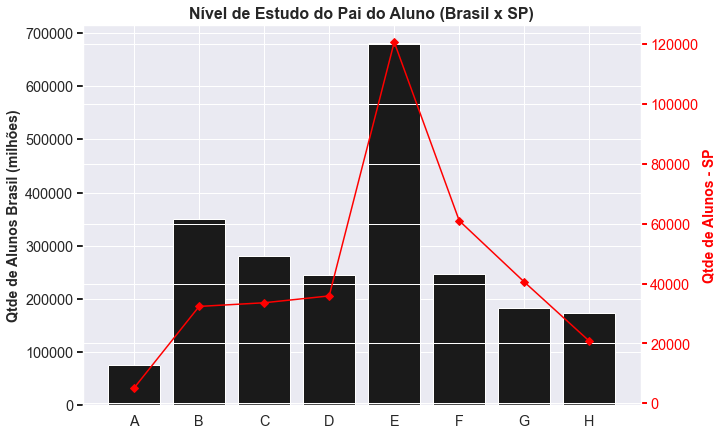

In [63]:
fig, ax = plt.subplots(figsize=(10,7))

ax.bar(x=df1['Q001'].value_counts().sort_index().index,
       height= df1['Q001'].value_counts().sort_index(),
       color= 'k') # dark color (case sensitive - must be lowercase)
ax.set_ylabel('Qtde de Alunos Brasil (milhões)', fontsize=14, weight= 'bold')
ax.tick_params(axis= 'y', width= 2,  labelsize= 'large')

ax1 = ax.twinx() # share the same 'x' axis
#ax1.set_ylim(0,1)
#ax1.yaxis.set_major_formatter(PercentFormatter(xmax=1.0)) # format to % (0-100%)

ax1.plot(sp_df['Q001'].value_counts().sort_index().index,
         sp_df['Q001'].value_counts().sort_index(),
         marker= 'D', # D for diamonds shape
         color= 'red')
ax1.set_ylabel('Qtde de Alunos - SP', color= 'red', fontsize=14, weight= 'bold')
ax1.tick_params(axis= 'y', colors= 'red', width= 2, labelsize= 'large')

plt.xlabel('Nível de Estudo do Pai do Aluno', fontsize= 14) 
ax.tick_params(axis= 'x', labelsize= 'large') 

#ax.set_title('Python Users Survey (2012 - 2019)', fontsize= 16, weight= 'bold') # ax or ax1 
plt.title('Nível de Estudo do Pai do Aluno (Brasil x SP)', fontsize= 16, weight= 'bold')
plt.show()

### Amazonas

In [64]:
am_df = df1[df1['SG_UF_PROVA']=='AM']
am_df['NU_NOTA_MT'].describe()

count    44560.000000
mean       486.419751
std         90.170945
min          0.000000
25%        419.300000
50%        464.200000
75%        534.000000
max        953.100000
Name: NU_NOTA_MT, dtype: float64

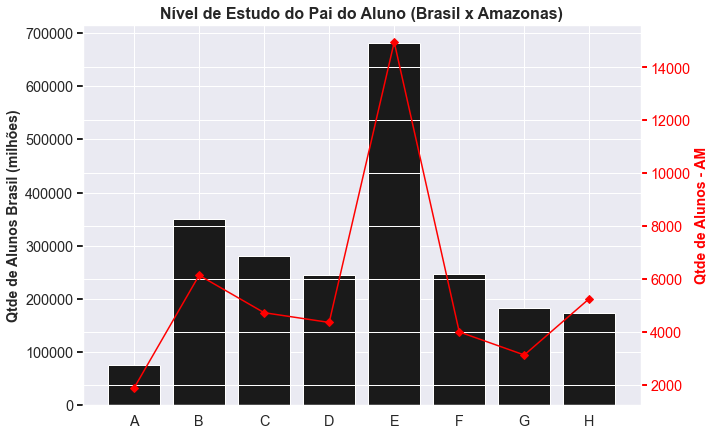

In [65]:
fig, ax = plt.subplots(figsize=(10,7))

ax.bar(x=df1['Q001'].value_counts().sort_index().index,
       height= df1['Q001'].value_counts().sort_index(),
       color= 'k') # dark color (case sensitive - must be lowercase)
ax.set_ylabel('Qtde de Alunos Brasil (milhões)', fontsize=14, weight= 'bold')
ax.tick_params(axis= 'y', width= 2,  labelsize= 'large')

ax1 = ax.twinx() # share the same 'x' axis
#ax1.set_ylim(0,1)
#ax1.yaxis.set_major_formatter(PercentFormatter(xmax=1.0)) # format to % (0-100%)

ax1.plot(am_df['Q001'].value_counts().sort_index().index,
         am_df['Q001'].value_counts().sort_index(),
         marker= 'D', # D for diamonds shape
         color= 'red')
ax1.set_ylabel('Qtde de Alunos - AM', color= 'red', fontsize=14, weight= 'bold')
ax1.tick_params(axis= 'y', colors= 'red', width= 2, labelsize= 'large')

plt.xlabel('Nível de Estudo do Pai do Aluno', fontsize= 14) 
ax.tick_params(axis= 'x', labelsize= 'large') 

#ax.set_title('Python Users Survey (2012 - 2019)', fontsize= 16, weight= 'bold') # ax or ax1 
plt.title('Nível de Estudo do Pai do Aluno (Brasil x Amazonas)', fontsize= 16, weight= 'bold')
plt.show()

### 10000 melhores - 10000 piores

In [66]:
melhores_df = df1.sort_values('NU_NOTA_MT', ignore_index=True, ascending=False).head(10000)
melhores_df['NU_NOTA_MT']

0       953.1
1       953.1
2       953.1
3       953.1
4       953.1
        ...  
9995    849.5
9996    849.5
9997    849.5
9998    849.5
9999    849.5
Name: NU_NOTA_MT, Length: 10000, dtype: float64

In [67]:
piores_df = df1.sort_values('NU_NOTA_MT', ascending=True).head(10000)
piores_df['NU_NOTA_MT']

407393       0.0
3081082      0.0
858441       0.0
172476       0.0
66478        0.0
           ...  
3202326    360.7
2532101    360.7
2000903    360.7
2846519    360.7
1763145    360.7
Name: NU_NOTA_MT, Length: 10000, dtype: float64

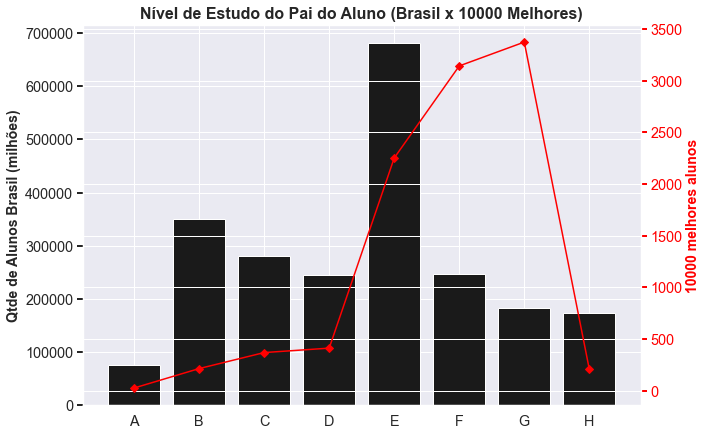

In [68]:
fig, ax = plt.subplots(figsize=(10,7))

ax.bar(x=df1['Q001'].value_counts().sort_index().index,
       height= df1['Q001'].value_counts().sort_index(),
       color= 'k') # dark color (case sensitive - must be lowercase)
ax.set_ylabel('Qtde de Alunos Brasil (milhões)', fontsize=14, weight= 'bold')
ax.tick_params(axis= 'y', width= 2,  labelsize= 'large')

ax1 = ax.twinx() # share the same 'x' axis
#ax1.set_ylim(0,1)
#ax1.yaxis.set_major_formatter(PercentFormatter(xmax=1.0)) # format to % (0-100%)

ax1.plot(melhores_df['Q001'].value_counts().sort_index().index,
         melhores_df['Q001'].value_counts().sort_index(),
         marker= 'D', # D for diamonds shape
         color= 'red')
ax1.set_ylabel('10000 melhores alunos', color= 'red', fontsize=14, weight= 'bold')
ax1.tick_params(axis= 'y', colors= 'red', width= 2, labelsize= 'large')

plt.xlabel('Nível de Estudo do Pai do Aluno', fontsize= 14) 
ax.tick_params(axis= 'x', labelsize= 'large') 

#ax.set_title('Python Users Survey (2012 - 2019)', fontsize= 16, weight= 'bold') # ax or ax1 
plt.title('Nível de Estudo do Pai do Aluno (Brasil x 10000 Melhores)', fontsize= 16, weight= 'bold')
plt.show()

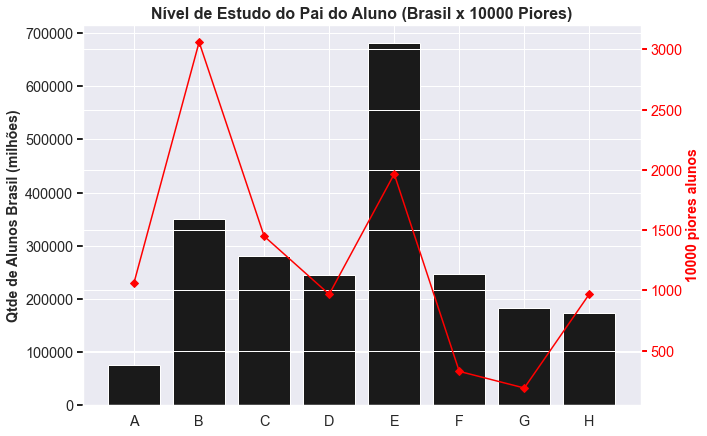

In [69]:
g, ax = plt.subplots(figsize=(10,7))

ax.bar(x=df1['Q001'].value_counts().sort_index().index,
       height= df1['Q001'].value_counts().sort_index(),
       color= 'k') # dark color (case sensitive - must be lowercase)
ax.set_ylabel('Qtde de Alunos Brasil (milhões)', fontsize=14, weight= 'bold')
ax.tick_params(axis= 'y', width= 2,  labelsize= 'large')

ax1 = ax.twinx() # share the same 'x' axis
#ax1.set_ylim(0,1)
#ax1.yaxis.set_major_formatter(PercentFormatter(xmax=1.0)) # format to % (0-100%)

ax1.plot(piores_df['Q001'].value_counts().sort_index().index,
         piores_df['Q001'].value_counts().sort_index(),
         marker= 'D', # D for diamonds shape
         color= 'red')
ax1.set_ylabel('10000 piores alunos', color= 'red', fontsize=14, weight= 'bold')
ax1.tick_params(axis= 'y', colors= 'red', width= 2, labelsize= 'large')

plt.xlabel('Nível de Estudo do Pai do Aluno', fontsize= 14) 
ax.tick_params(axis= 'x', labelsize= 'large') 

#ax.set_title('Python Users Survey (2012 - 2019)', fontsize= 16, weight= 'bold') # ax or ax1 
plt.title('Nível de Estudo do Pai do Aluno (Brasil x 10000 Piores)', fontsize= 16, weight= 'bold')
plt.show()

### Análise por município entre os 10000 melhores resultados

#### Fortaleza é a segunda melhor cidade entre os 10000 melhores resultados.

In [70]:
melhores_df['CO_MUNICIPIO_PROVA'].value_counts().head(15)

3550308    875
2304400    569
3106200    512
3304557    491
5300108    400
2211001    250
2611606    246
5208707    243
4106902    196
4314902    187
2507507    167
2408102    157
3549904    155
3509502    129
2927408    129
Name: CO_MUNICIPIO_PROVA, dtype: int64

#### Entre os 10000 melhores resultados, 756 estudaram em escola pública, 2346 em escola privada e 6898 não responderam

In [71]:
melhores_df['TP_ESCOLA'].value_counts()

1    6898
3    2346
2     756
Name: TP_ESCOLA, dtype: int64

#### Resultado dos estudandes de Escolas Públicas  
Fortaleza aparece em segundo lugar

In [72]:
melhores_df[melhores_df['TP_ESCOLA']==2]['CO_MUNICIPIO_PROVA'].value_counts().head(10)

3304557    38
2304400    33
3106200    27
2611606    27
5300108    27
3550308    26
3205309    24
4106902    24
4314902    20
2408102    18
Name: CO_MUNICIPIO_PROVA, dtype: int64

#### Resultado dos estudandes de Escolas Privadas  
Fortaleza aparece em quarto lugar

In [73]:
melhores_df[melhores_df['TP_ESCOLA']==3]['CO_MUNICIPIO_PROVA'].value_counts().head(10)

3550308    278
3304557    148
3106200    132
2304400    120
2211001     76
5208707     69
5300108     67
2611606     67
4106902     57
2927408     41
Name: CO_MUNICIPIO_PROVA, dtype: int64

### São Paulo

In [74]:
saopaulo_df = df1[df1['CO_MUNICIPIO_PROVA']==3550308]
saopaulo_df['NU_NOTA_MT'].describe()

count    96448.000000
mean       571.587219
std        115.795693
min          0.000000
25%        475.700000
50%        565.900000
75%        657.000000
max        953.100000
Name: NU_NOTA_MT, dtype: float64

### Fortaleza

In [75]:
fortaleza_df = df1[df1['CO_MUNICIPIO_PROVA']==2304400]
fortaleza_df['NU_NOTA_MT'].describe()

count    45511.000000
mean       551.366237
std        122.800090
min          0.000000
25%        448.900000
50%        529.800000
75%        640.300000
max        953.100000
Name: NU_NOTA_MT, dtype: float64

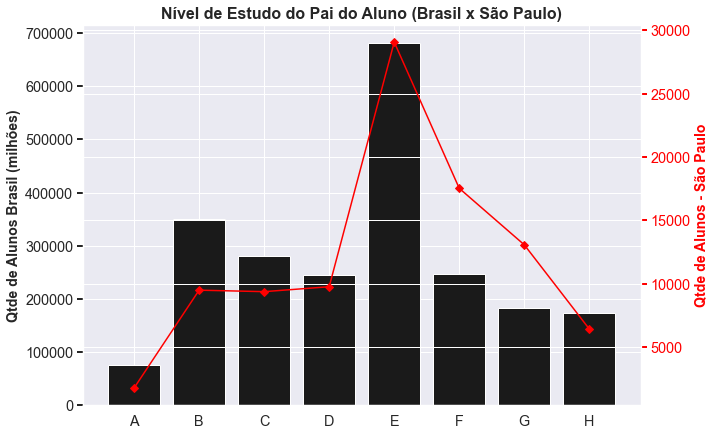

In [76]:
fig, ax = plt.subplots(figsize=(10,7))

ax.bar(x=df1['Q001'].value_counts().sort_index().index,
       height= df1['Q001'].value_counts().sort_index(),
       color= 'k') # dark color (case sensitive - must be lowercase)
ax.set_ylabel('Qtde de Alunos Brasil (milhões)', fontsize=14, weight= 'bold')
ax.tick_params(axis= 'y', width= 2,  labelsize= 'large')

ax1 = ax.twinx() # share the same 'x' axis
#ax1.set_ylim(0,1)
#ax1.yaxis.set_major_formatter(PercentFormatter(xmax=1.0)) # format to % (0-100%)

ax1.plot(saopaulo_df['Q001'].value_counts().sort_index().index,
         saopaulo_df['Q001'].value_counts().sort_index(),
         marker= 'D', # D for diamonds shape
         color= 'red')
ax1.set_ylabel('Qtde de Alunos - São Paulo', color= 'red', fontsize=14, weight= 'bold')
ax1.tick_params(axis= 'y', colors= 'red', width= 2, labelsize= 'large')

plt.xlabel('Nível de Estudo do Pai do Aluno', fontsize= 14) 
ax.tick_params(axis= 'x', labelsize= 'large') 

#ax.set_title('Python Users Survey (2012 - 2019)', fontsize= 16, weight= 'bold') # ax or ax1 
plt.title('Nível de Estudo do Pai do Aluno (Brasil x São Paulo)', fontsize= 16, weight= 'bold')
plt.show()

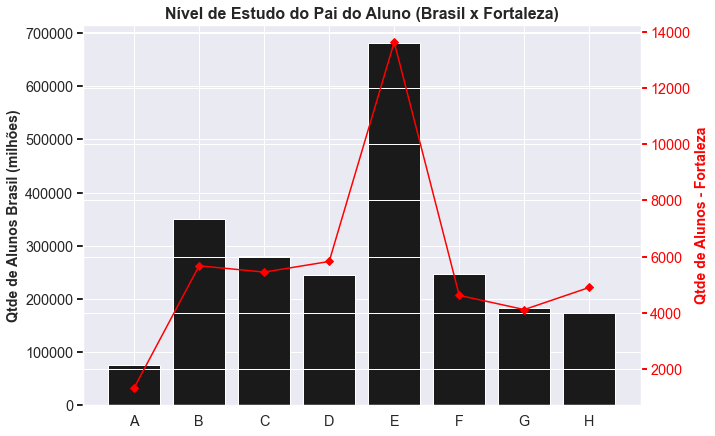

In [77]:
fig, ax = plt.subplots(figsize=(10,7))

ax.bar(x=df1['Q001'].value_counts().sort_index().index,
       height= df1['Q001'].value_counts().sort_index(),
       color= 'k') # dark color (case sensitive - must be lowercase)
ax.set_ylabel('Qtde de Alunos Brasil (milhões)', fontsize=14, weight= 'bold')
ax.tick_params(axis= 'y', width= 2,  labelsize= 'large')

ax1 = ax.twinx() # share the same 'x' axis
#ax1.set_ylim(0,1)
#ax1.yaxis.set_major_formatter(PercentFormatter(xmax=1.0)) # format to % (0-100%)

ax1.plot(fortaleza_df['Q001'].value_counts().sort_index().index,
         fortaleza_df['Q001'].value_counts().sort_index(),
         marker= 'D', # D for diamonds shape
         color= 'red')
ax1.set_ylabel('Qtde de Alunos - Fortaleza', color= 'red', fontsize=14, weight= 'bold')
ax1.tick_params(axis= 'y', colors= 'red', width= 2, labelsize= 'large')

plt.xlabel('Nível de Estudo do Pai do Aluno', fontsize= 14) 
ax.tick_params(axis= 'x', labelsize= 'large') 

#ax.set_title('Python Users Survey (2012 - 2019)', fontsize= 16, weight= 'bold') # ax or ax1 
plt.title('Nível de Estudo do Pai do Aluno (Brasil x Fortaleza)', fontsize= 16, weight= 'bold')
plt.show()

### Comparando as médias da nota de matemática por renda familiar das duas melhores cidades com a situação do Brasil e de Amazonas (estado com a pior performance no Enem 2021)

In [78]:
nota_por_renda_sp = [saopaulo_df[saopaulo_df['Q006']==n]['NU_NOTA_MT'].mean() for n in niveis_renda]

In [79]:
nota_por_renda_fortaleza = [fortaleza_df[fortaleza_df['Q006']==n]['NU_NOTA_MT'].mean() for n in niveis_renda]

In [80]:
nota_por_renda_amazonas = [am_df[am_df['Q006']==n]['NU_NOTA_MT'].mean() for n in niveis_renda]

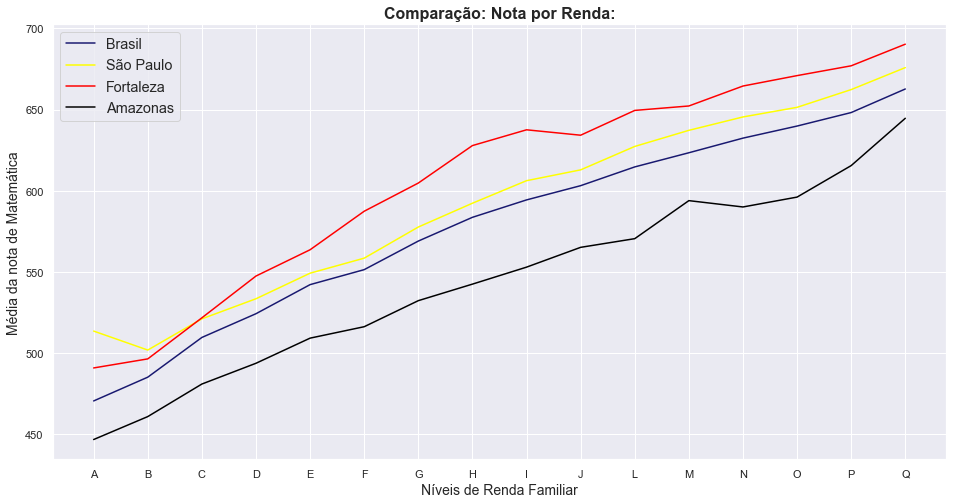

In [81]:
legend_labels = ['Brasil', 'São Paulo', 'Fortaleza', 'Amazonas'] # Labels para a legenda (na mesma ordem dos plt.plot)

plt.figure(figsize=(16,8))
plt.plot(niveis_renda, nota_por_renda, color='midnightblue')
plt.plot(niveis_renda, nota_por_renda_sp, color='yellow') 
plt.plot(niveis_renda, nota_por_renda_fortaleza, color='red') 
plt.plot(niveis_renda, nota_por_renda_amazonas, color='black')
plt.legend(labels=legend_labels, fontsize='large')
plt.title('Comparação: Nota por Renda:', fontsize=16, fontweight='bold')
plt.ylabel('Média da nota de Matemática', fontsize=14)
plt.xlabel('Níveis de Renda Familiar', fontsize=14)
plt.show()

#  <a name="conclusao"> Conclusão</a>
[Voltar ao índice](#indice)

Fica claro que a relação direta entre o nível de estudo dos pais e a performance no Enem observada na análise dos dados do questionário sócioeconômico se reflete no melhor e pior estado (São Paulo e Amazonas respectivamente) em desempenho no Enem, assim como nas dez mil melhores e piores notas de matemática do Enem 2021. Porém quando analisamos os dez mil melhores resultados do Enem por município, verificamos que Fortaleza fica em segundo lugar em quantidade de alunos entre os melhores, mas apresenta uma distribuição entre os níveis de estudo dos pais muito semelhante a do pais, mas com desempenho muito melhor.
Quando comparamos as notas de matemática por nível de renda familar também observamos que o desempenho de Fortaleza é superior ao da cidade de São Paulo que está em primeiro lugar em quantidade de alunos entre as dez mil melhores notas. Isso indica que deve haver outros fatores, além dos sócioeconômicos, que influenciam o desempenho dos alunos de Fortaleza no exame do Enem.
Na última década, as escolas públicas do Ceará têm se destacado nas avaliações nacionais de qualidade de ensino, ocupando em massa as primeiras colocações quando o assunto é ensino fundamental. Os dados apresentados nessa análise corroboram esse bom desempenho escolar, pois mostram que as notas dos alunos de Fortaleza no Enem de 2021 foi acima da média nacional mesmo não apresentando uma situação socioeconômica acima da média do país, proporcionalmente ao desempenho dos fortalezenses.